# Traditional Sparse coding
*** Author: Thomas Rolland ***

Ref: https://www.di.ens.fr/willow/pdfs/icml09.pdf
        
```
Sparse coding—that is, modelling data vectors as
sparse linear combinations of basis elements—is
widely used in machine learning, neuroscience,
signal processing, and statistics. This paper focuses
on learning the basis set, also called dictionary,
to adapt it to specific data, an approach
that has recently proven to be very effective for
signal reconstruction and classification in the audio
and image processing domains. This paper
proposes a new online optimization algorithm
for dictionary learning, based on stochastic approximations,
which scales up gracefully to large
datasets with millions of training samples. A
proof of convergence is presented, along with
experiments with natural images demonstrating
that it leads to faster performance and better dictionaries
than classical batch algorithms for both
small and large datasets.
```


If you have any question, send me an email at: trolland@protonmail.ch

In [1]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
# dataset
from tensorflow.examples.tutorials.mnist import input_data
# dictionary learning algorithm
import spams # http://spams-devel.gforge.inria.fr/

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Main
Here we'll show the influence of the number of atoms in the dictionary on the cost function

In [2]:
# Load dataset
mnist = input_data.read_data_sets('MNIST_DATA',one_hot=True)
digits = mnist.train.images[:2000] # Remove [:number] to train on all dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Preprocessing the training data

In [3]:
[m,n] = np.shape(digits.data)
X = np.transpose(digits.data)
X = np.asfortranarray(X,dtype=float)

define usefull constants

In [4]:
lambda1 = 1.2/math.sqrt(m)
cost = []
k_test = [200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]

Loop over all different k and compute sparse coding and dictionary step to compute the value of the cost function

In [5]:
for elem in k_test:
    
    # Spams parameters
    param = {'mode':5, 'K':elem, 'lambda1':lambda1, 'numThreads':5, 'batchsize':256, 'iter':200}
    
    # Dictionary learning step
    D = spams.trainDL(X,**param)
    
    # Sparse coding step
    H = spams.omp(X,D,lambda1=lambda1)
    
    # Compute cost function
    residual = X - (D @ H)
    reconstTerm = np.linalg.norm(residual,2)
    sparseTerm = np.linalg.norm(H.toarray().flat,0)
    print("Cost:")
    print(sparseTerm+reconstTerm)
    cost.append(sparseTerm+reconstTerm)


Cost:
79410.09721598322
Cost:
74163.03909517077
Cost:
70076.3716762491
Cost:
67908.82884416782
Cost:
66279.41762265915
Cost:
64800.054305335354
Cost:
63417.82058127
Cost:
62366.49839095069
Cost:
61259.216325938556
Cost:
61152.03090705706
Cost:
59585.795704070246
Cost:
59154.561120572806
Cost:
57196.299626210384
Cost:
56413.07617253834
Cost:
53742.856571602446
Cost:
52035.636336402145
Cost:
48822.42970504284
Cost:
44402.45119281222
Cost:
42397.89252954081


## Display some information

In [7]:
# Get all data for display
H_dis = np.transpose(H.todense()) 
recons = D @ H
recons = np.transpose(recons)
data = np.transpose(X)

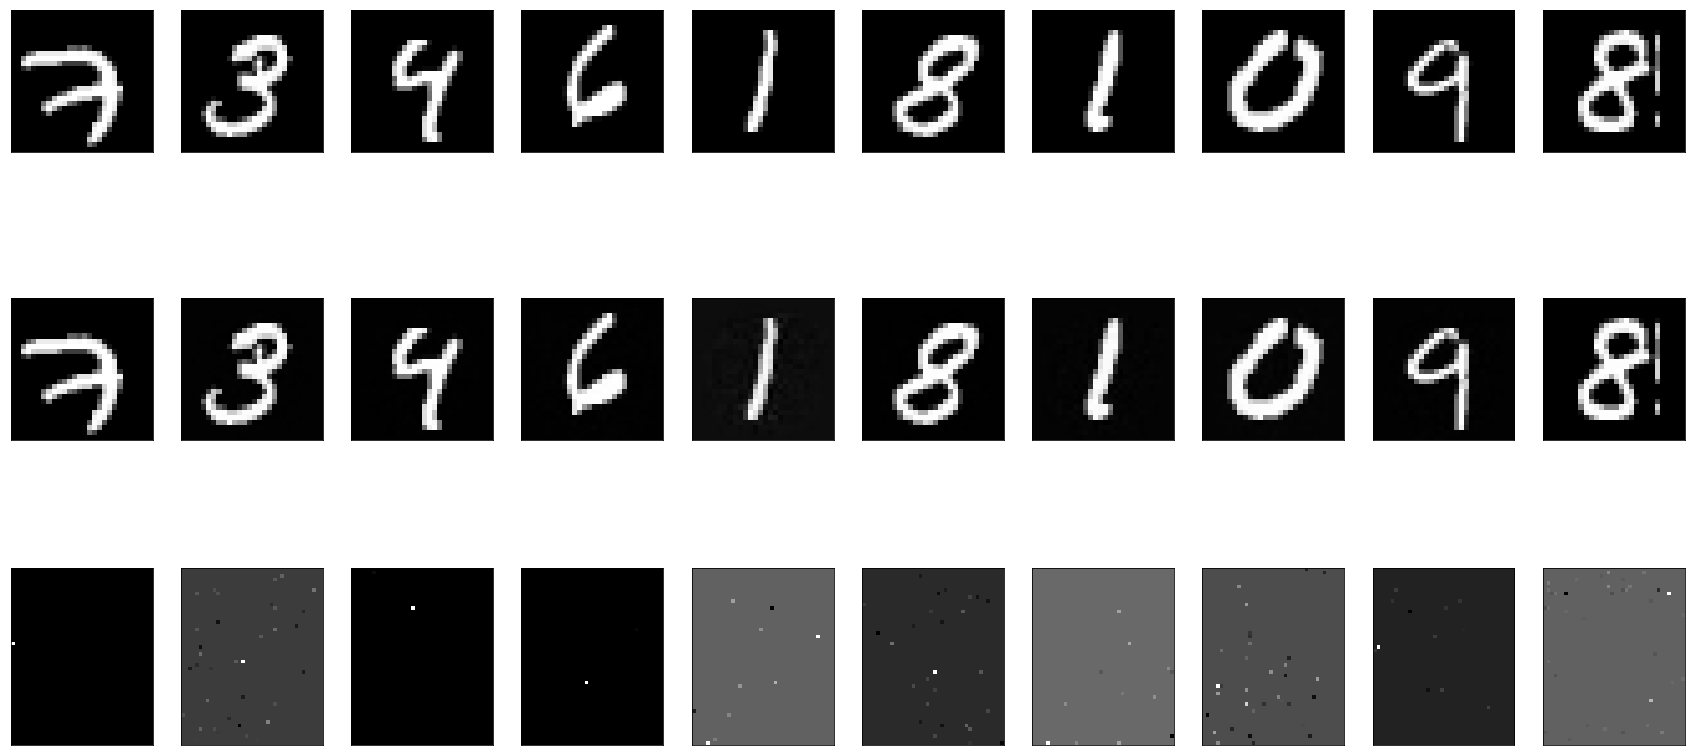

In [14]:
plt.figure(figsize=(30,15))

n_show = 10 #  number of image that we show
for i in range(n_show):
    # display original
    ax = plt.subplot(3,n_show,i+1)
    plt.imshow(data[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3,n_show,i+1+n_show)
    plt.imshow(recons[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display coef
    ax = plt.subplot(3,n_show,i+1+2*n_show)
    plt.imshow(H_dis[i].reshape(50,40))
    # Here we choose this reshape because H in [nb_samples, 2000]
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
plt.show()

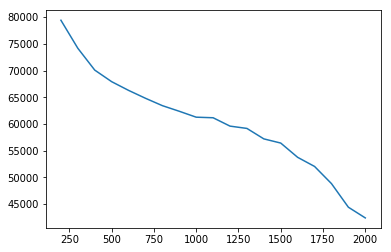

In [11]:
# Evolution of cost function depending of the number of atoms
plt.figure()
plt.plot(k_test,cost)
plt.show()